<a href="https://colab.research.google.com/github/bodarynka/pyton-data-analytycs/blob/main/%D0%94%D0%B0%D1%80%D0%B8%D0%BD%D0%B0_%D0%91%D0%BE%D1%8F%D0%BA%D1%96%D0%B2%D1%81%D1%8C%D0%BA%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 19.0 MB/s eta 0:00:00


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
import pandas as pd

In [3]:
con = mysql.connector.connect( user='user1',
                              password='7oygWy6P',
                              host='3.68.62.36',
                               database = "employees")


3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [4]:
cursor = con.cursor()


In [13]:
sql = """
    SELECT MIN(hire_date), MAX(hire_date)
    FROM employees;
"""
cursor.execute(sql)

# Отримання результатів
result = cursor.fetchall()

# Виведення результатів
min_date, max_date = result[0]
print(f"Мінімальна дата найму: {min_date}")
print(f"Максимальна дата найму: {max_date}")


Мінімальна дата найму: 1985-01-01
Максимальна дата найму: 2000-01-28


Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [14]:
sql = """
    SELECT emp_no, salary, from_date, to_date
    FROM salaries
    WHERE (emp_no, to_date) IN (
        SELECT emp_no, MAX(to_date)
        FROM salaries
        GROUP BY emp_no
    );
"""

# Виконання запиту
cursor.execute(sql)

# Отримання результатів у вигляді DataFrame
res = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Виведення назв колонок, розміру DataFrame та перших трьох записів
print("Назви колонок:", res.columns)
print("Розмір DataFrame:", res.shape)
print("Перші 3 записи:")
print(res.head(3))

Назви колонок: Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')
Розмір DataFrame: (300180, 4)
Перші 3 записи:
   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


In [21]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [16]:
# Перевіряємо тип даних у колонці to_date
to_date_dtype = res['to_date'].dtype

# Підраховуємо кількість значень рівних '9999-01-01'
to_date_equals_9999 = (res['to_date'] == '9999-01-01').sum()

# Підраховуємо кількість значень, що не рівні '9999-01-01'
to_date_not_equals_9999 = (res['to_date'] != '9999-01-01').sum()

print(f"Тип даних у колонці to_date: {to_date_dtype}")
print(f"Кількість значень '9999-01-01': {to_date_equals_9999}")
print(f"Кількість інших значень: {to_date_not_equals_9999}")

Тип даних у колонці to_date: object
Кількість значень '9999-01-01': 0
Кількість інших значень: 300180


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

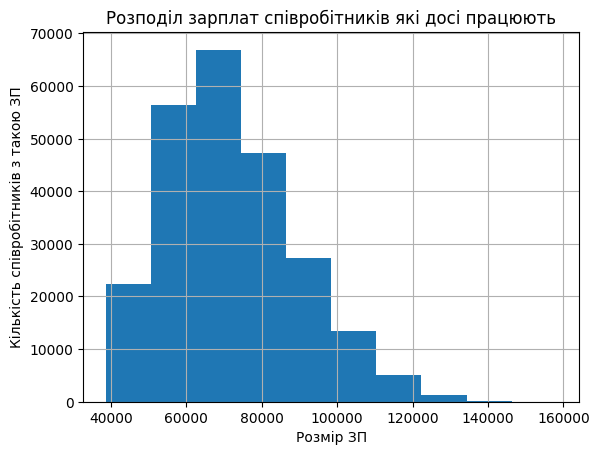

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
res[res.to_date==datetime.date(9999, 1, 1)].salary.hist()
plt.title('Розподіл зарплат співробітників які досі працюють')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП');


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()